<h1>Car Price Data EDA, Cleaning, Validation, and Prediction</h1>

<h3>Notes and Citations</h3>

In [203]:
# Data was taken from Kaggle page: 
# https://www.kaggle.com/datasets/vijayaadithyanvg/car-price-predictionused-cars

# Based on a tutorial on the Boston Housing dataset:
# https://towardsdatascience.com/machine-learning-project-predicting-boston-house-prices-with-regression-b4e47493633d

# path to dataset .csv file
# C:\Users\xD\Downloads\car_price_data\car_data.csv

<h3>Preparing the Data</h3>

In [204]:
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from sklearn.model_selection import ShuffleSplit

# Pretty display for notebooks
%matplotlib inline

# Load the car price dataset from .csv to DataFrame
data = pd.read_csv('C:\\Users\\xD\\Downloads\\car_price_data\\car_data.csv')
data

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [205]:
# remove Car_Name column
data = data.drop('Car_Name', axis=1)

# rename columns for style/clarity
# rename Driven_kms to Odometer?
# change 'Owner' (number of previous owners) to 'History' (car is New or Used)
data.rename({'Driven_kms': 'Odometer', 'Selling_type': 'Transaction', 'Owner': 'History', 'Fuel_Type': 'Fuel', 'Selling_Price': 'Sale_Price'}, axis=1, inplace=True)

data.head()

,Year,Sale_Price,Present_Price,Odometer,Fuel,Transaction,Transmission,History
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [206]:
# find the index of the record where the value of Owner is 3
# this record is an outlier; all other records have Owner value 0 or 1
# Owner could be redone as a binary value describing whether the car is new or used
# however, this is impractical as 290 of the remaining 300 records (or 96.666%) have value 0 for 'Owner'
# so the Owner column is removed

# Possibility here to measure the correlation between the value of Owner and other features, to see if Owner has any significant effect on other features.
# If it does, it may be worth keeping the column and just removing the single outlier record with Owner value 3. 
# If it does not, we can be more sure of the decision to remove the entire column.

# use that name to find the index of the outlier record, drop the record by index
# i = data[(data.History == 3)].index
# data = data.drop(i)
# max(data.History)

In [207]:
# data = data.drop('History', axis=1)
# data.head()
data['History'] = data['History'].replace(to_replace={0: 'New', 1: 'Used', 2: 'Used', 3: 'Used'})
# data['History'] = data['History'].astype('category')

In [208]:
# remove 2 records with value 'CNG' in 'Fuel' column
data = data.drop(data[data['Fuel'] == 'CNG'].index)

# Confirm that the number of unique values in 'Fuel' is 2 (Petrol and Diesel)
data['Fuel'].nunique()

2

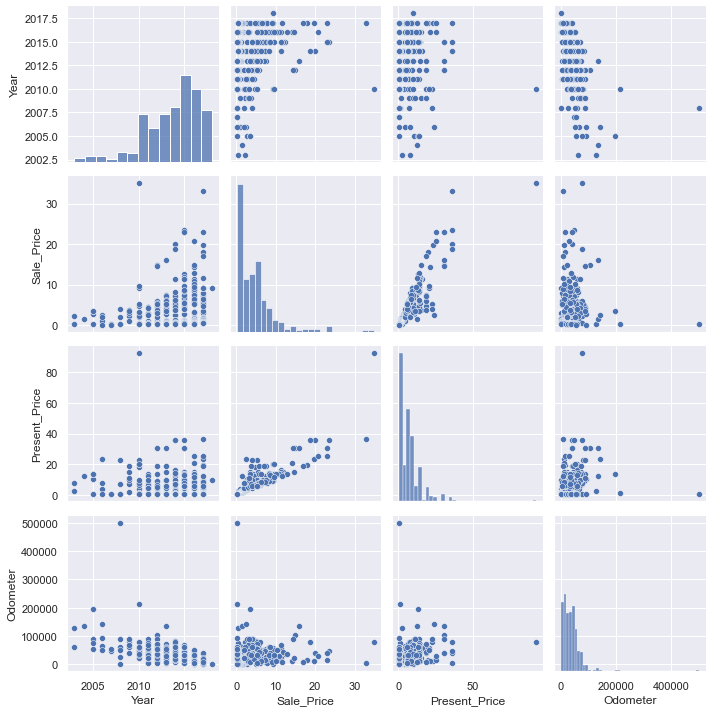

In [209]:
# Calculate and show pair plot. This allows for easy visual comparison of quantitative columns.
sns.pairplot(data, height=2.5)
plt.tight_layout()

[Text(0.5, 0, 'Present_Price (skew 4.071)')]

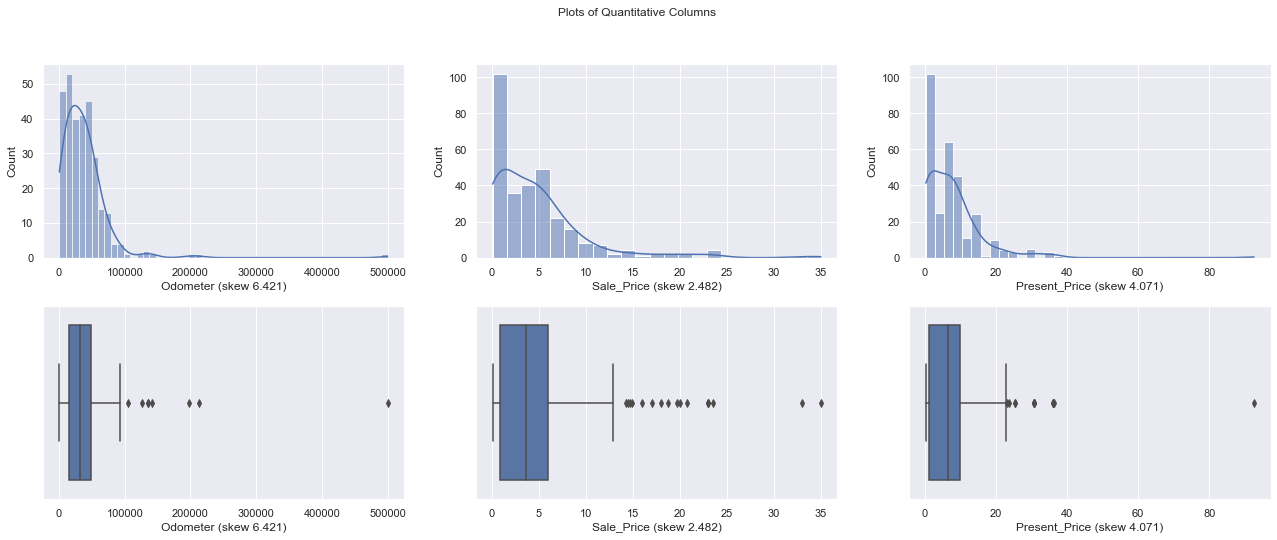

In [210]:
# From the multiplot above, we can see some outliers in the quantitative columns of the data. 
# Let's check the skewness of 'Odometer', 'Sale_Price', and 'Present_Price'.
# The skewness of these columns tells us they are all right-skewed, indicating the presence of excessively large values.
# Let's use histograms and box plots to further inspect the data, specifically for columns 'Odometer', 'Sale_Price', and 'Present_Price'.

# consider a multiplot of box plots for the quantitative columns of the dataset, for which the following could be helpful:
# https://stackoverflow.com/questions/16392921/make-more-than-one-chart-in-same-ipython-notebook-cell
# https://stackoverflow.com/questions/44552489/plotting-multiple-boxplots-in-seaborn
# https://dev.to/thalesbruno/subplotting-with-matplotlib-and-seaborn-5ei8

odometer_skew = data['Odometer'].skew()
selling_skew = data['Sale_Price'].skew()
present_skew = data['Present_Price'].skew()

fig, axes = plt.subplots(2, 3, figsize=(22, 8))
plt.subplots_adjust(hspace=0.25)
fig.suptitle('Plots of Quantitative Columns')

sns.histplot(ax=axes[0, 0], data=data, x='Odometer', kde=True).set(xlabel='Odometer (skew {:.3f})'.format(odometer_skew))
sns.histplot(ax=axes[0, 1], data=data, x='Sale_Price', kde=True).set(xlabel='Sale_Price (skew {:.3f})'.format(selling_skew))
sns.histplot(ax=axes[0, 2], data=data, x='Present_Price', kde=True).set(xlabel='Present_Price (skew {:.3f})'.format(present_skew))

sns.boxplot(ax=axes[1, 0], data=data, x='Odometer').set(xlabel='Odometer (skew {:.3f})'.format(odometer_skew))
sns.boxplot(ax=axes[1, 1], data=data, x='Sale_Price').set(xlabel='Sale_Price (skew {:.3f})'.format(selling_skew))
sns.boxplot(ax=axes[1, 2], data=data, x='Present_Price').set(xlabel='Present_Price (skew {:.3f})'.format(present_skew))



<h3>Removing Outliers</h3>

In [211]:
# remove outliers based on Z-score as per 
# https://stackoverflow.com/questions/23199796/detect-and-exclude-outliers-in-a-pandas-dataframe
# all records with a value more than 3 standard deviations away from the mean for any column will be removed
length_before_outliers = len(data)

data = data[(np.abs(stats.zscore(data.select_dtypes(['number']))) < 3).all(axis=1)]

records_removed = length_before_outliers - len(data)
percent_removed = (records_removed / length_before_outliers) * 100
print('{} records ({:.2f}% of data) with any outlying values were removed. '.format(records_removed, percent_removed))

15 records (5.02% of data) with any outlying values were removed. 


[Text(0.5, 0, 'Present_Price (skew 1.287)')]

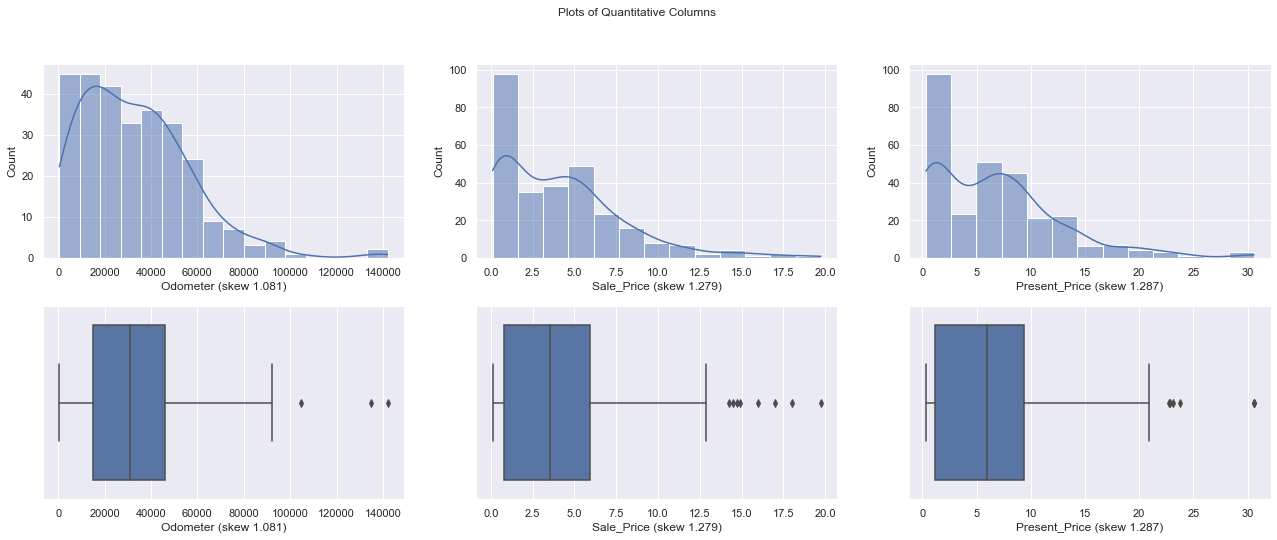

In [212]:
# Let's take a look at our plots again after the outliers have been removed.
# https://seaborn.pydata.org/generated/seaborn.boxplot.html

odometer_skew = data['Odometer'].skew()
selling_skew = data['Sale_Price'].skew()
present_skew = data['Present_Price'].skew()

fig, axes = plt.subplots(2, 3, figsize=(22, 8))
plt.subplots_adjust(hspace=0.25)
fig.suptitle('Plots of Quantitative Columns')

sns.histplot(ax=axes[0, 0], data=data, x='Odometer', kde=True).set(xlabel='Odometer (skew {:.3f})'.format(odometer_skew))
sns.histplot(ax=axes[0, 1], data=data, x='Sale_Price', kde=True).set(xlabel='Sale_Price (skew {:.3f})'.format(selling_skew))
sns.histplot(ax=axes[0, 2], data=data, x='Present_Price', kde=True).set(xlabel='Present_Price (skew {:.3f})'.format(present_skew))

sns.boxplot(ax=axes[1, 0], data=data, x='Odometer').set(xlabel='Odometer (skew {:.3f})'.format(odometer_skew))
sns.boxplot(ax=axes[1, 1], data=data, x='Sale_Price').set(xlabel='Sale_Price (skew {:.3f})'.format(selling_skew))
sns.boxplot(ax=axes[1, 2], data=data, x='Present_Price').set(xlabel='Present_Price (skew {:.3f})'.format(present_skew))



In [213]:
# # https://stackoverflow.com/questions/53306854/adding-standardscaler-of-values-as-new-column-to-dataframe-returns-partly-nans
# # https://lifewithdata.com/2022/03/08/what-is-standardscaler-in-sklearn-and-how-to-use-it/
# # Scale the data using StandardScaler
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()

# data_numeric = data.select_dtypes(['number'])
# data_categorical = data.select_dtypes(['O'])

# data_numeric = scaler.fit_transform(data_numeric)
# data_numeric

# data_numeric = pd.DataFrame(data_numeric)
# data_numeric.reset_index()

# data = pd.concat([data_numeric, data_categorical], ignore_index=True, sort=False)
# # data.reset_index()
# data

In [214]:
# sns.pairplot(data, height=3, kind="reg", corner=True)
# plt.tight_layout()

<h3>One-hot Encoding</h3>
<h4> change this section to use the sklearn OneHotEncoder </h4>
<a href=https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html#sklearn.preprocessing.OneHotEncoder>OneHotEncoder</a>

In [215]:
# Let's convert the categorical variables into a binary representation using one-hot encoding with the help of:
# https://stackoverflow.com/questions/37292872/how-can-i-one-hot-encode-in-python

# one-hot encoding is performed after outlier removal by z-score to ensure that none of the categorical features are treated as numerical

# Each categorical column will be split into two columns
# Fuel will be replaced by two columns, Petrol and Diesel. If a record had value 'Petrol' in 
# the original Fuel column, its value in the new Petrol column will be 1 and its value in 
# the new Diesel column will be 0 and vice versa.
# Columns Transaction and Transmission will follow the same pattern.


dummies = pd.get_dummies(data.Fuel)
data = pd.concat([data, dummies], axis=1)
data = data.drop(['Fuel'], axis=1)

dummies = pd.get_dummies(data.Transaction)
data = pd.concat([data, dummies], axis=1)
data = data.drop(['Transaction'], axis=1)

dummies = pd.get_dummies(data.Transmission)
data = pd.concat([data, dummies], axis=1)
data = data.drop(['Transmission'], axis=1)

dummies = pd.get_dummies(data.History)
data = pd.concat([data, dummies], axis=1)
data = data.drop(['History'], axis=1)

data.describe()

,Year,Sale_Price,Present_Price,Odometer,Diesel,Petrol,Dealer,Individual,Automatic,Manual,New,Used
count,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000,284.000000
mean,2013.767606,4.115458,6.679542,33194.651408,0.176056,0.823944,0.637324,0.362676,0.105634,0.894366,0.961268,0.038732
std,2.664159,3.667466,5.894771,23403.700226,0.381540,0.381540,0.481621,0.481621,0.307911,0.307911,0.193297,0.193297
min,2005.000000,0.100000,0.320000,500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2012.000000,0.795000,1.140000,15000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
50%,2014.000000,3.555000,5.935000,30876.500000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,2016.000000,5.912500,9.400000,45960.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000
max,2018.000000,19.750000,30.610000,142000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [216]:
# validate that the one-hot encoding was successful
# number of records == sum(Diesel) + sum(Petrol)
# this assumes no null or missing values in the original categorical columns

print('One-hot encoding validation: ')
print('Fuel:         {}'.format(len(data) == sum(data['Diesel']) + sum(data['Petrol'])))
print('History:      {}'.format(len(data) == sum(data['New']) + sum(data['Used'])))
print('Transaction:  {}'.format(len(data) == sum(data['Dealer']) + sum(data['Individual'])))
print('Transmission: {}'.format(len(data) == sum(data['Automatic']) + sum(data['Manual'])))



One-hot encoding validation: 
Fuel:         True
History:      True
Transaction:  True
Transmission: True


    This correlation matrix also provides a checkpoint at which the one-hot encoding can be validated. Assuming that each record in the data has a value of 1 for only one of the two new columns resulting from one-hot encoding, the correlation between those two columns will equal -1.00. We can see this is the case in the above correlation matrix, e.g. for the cell at the intersection of the 'Manual' and 'Automatic' column labels. If the correlation is not -1.00, we can suspect that there exists some record for which a pair of one-hot columns has the same value. This would be invalid in that each record should only have value 1 in one column of each one-hot pair.

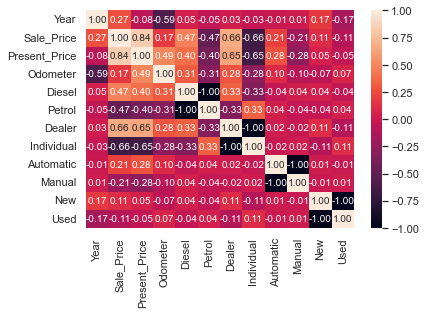

In [217]:
# Calculate and show correlation matrix
cm = np.corrcoef(data.values.T)
sns.set(font_scale=1.0)
# sns.color_palette("magma", as_cmap=True)
hm = sns.heatmap(cm,
                 cbar=True,
                 cmap='rocket',
                 annot=True,
                 square=False,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=data.columns,
                 xticklabels=data.columns)

    Since we intend to build a model to predict Present_Price, let's look at its row or column in the correlation matrix. We can look at just the row or the column, as they are identical. In this instance, we'll look at the row. Reading across the Present_Price row, in the first cell we can see that it has only a small negative correlation with Year. <br> In the second cell, we find that Present_Price and Sale_Price have a correlation of 0.87. It makes sense that the price the car last sold at would strongly correlate with its current price. <br> Next, we can safely ignore the value of 1.00 in the third cell because that is the intersection with Present_Price's own column. <br> The fourth cell indicates some degree of correlation with Odometer. <br> The rest of the cells in the row are the one-hot encoded columns. Each pair has a significant correlation with Present_Price.

<h3>Model Training and Inference</h3>

In [218]:
present_price = data['Present_Price']
features = data.drop('Present_Price', axis = 1)

In [219]:
# Import 'train_test_split'
from sklearn.model_selection import train_test_split

# Shuffle and split the data into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(features, present_price, test_size=0.2, random_state = 42)

In [220]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.metrics import make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression



""" Performs grid search over the 'max_depth' parameter for a 
    decision tree regressor trained on the input data [X, y]. """

# Fit the training data to the model using grid search

# Create cross-validation sets from the training data
cv_sets = ShuffleSplit(n_splits = 10, test_size = 0.20, random_state = 0)

# Create a regressor object
regressor = LinearRegression()

# Dictionary of parameter settings for Grid Search Cross-validation
# params = [{'kernel': ['poly', 'rbf', 'sigmoid'], 'C': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0], 'epsilon': [100.0, 10.0, 1.0, 0.1, 0.01, 0.001, 0.0001]}]
# param_grid = [ {'C': [1, 10, 100, 1000], 'kernel': ['linear']}, {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}, ]
params = [{}]

# Set the scoring function as r2_score
scoring_fnc = make_scorer(r2_score)

# Create the grid search cv object --> GridSearchCV()
grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets, verbose=2)

# Fit the grid search object to the data to compute the optimal model
grid = grid.fit(X_train, y_train)

# Return the optimal model after fitting the data
model = grid.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s
[CV] END .................................................... total time=   0.0s


In [221]:
# Produce the value for 'max_depth'
# print(f"Parameter 'best_loss_' is {model.best_loss_} for the optimal model.")

model.coef_

array([-2.50005003e-01,  1.29552562e+00,  5.86819092e-05, -5.86394345e-01,
        5.86394345e-01,  4.60323464e-01, -4.60323464e-01,  3.73238378e-01,
       -3.73238378e-01,  2.94866021e-01, -2.94866021e-01])

In [222]:
# Produce a matrix for client data
client_data = [[2019, 4.0, 30000, 0, 1, 0, 1, 0, 1, 0, 1], # Client 1
               [2015, 2.5, 60000, 0, 1, 0, 1, 1, 0, 0, 1], # Client 2
               [2021, 7.3, 500, 1, 0, 1, 0, 0, 1, 1, 0]]  # Client 3


# Show predictions
for i, price in enumerate(model.predict(client_data)):
    print(f"Predicted present price for Client {i+1}'s car: {price*100000:,.2f} rupee")

Predicted present price for Client 1's car: 395,741.79 rupee
Predicted present price for Client 2's car: 552,108.35 rupee
Predicted present price for Client 3's car: 633,911.63 rupee


In [223]:
# https://towardsdatascience.com/model-evaluation-in-scikit-learn-abce32ee4a99

# Evaluate the DecisionTreeRegressor using R^2, Mean Absolute Error, and Root Mean Squared Error
y_pred = model.predict(X_test)
print(f"R^2 : {r2_score(y_test, y_pred):.3f} (using r2_score)")
print(f"R^2 : {model.score(X_test, y_pred):.3f} (using model's .score() method)")
print(f"MAE : {mean_absolute_error(y_test, y_pred):.3f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

R^2 : 0.825 (using r2_score)
R^2 : 1.000 (using model's .score() method)
MAE : 1.580
RMSE: 2.726


In [224]:
# sns.regplot(X_test, y_pred)

C:\Users\xD\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


ValueError: regplot inputs must be 1d

<h2>To Do</h2>

 * Sale_Price and Present_Price are given in units of lakh Indian Rupees
 * multiply these columns by 100,000 to change the units to just Indian Rupees
 * convert to USD using either the present exchange rate, or the exchange rate on the date the data was posted to Kaggle
<br>
<br>
 * get DecisionTreeRegressor working on car data
 * play around with hyperparameters
 * consider other types of models

test